#  EDUNET FOUNDATION - Self Practice Excercise

## Lab 1
## Problem Statement

### ""For extended data of CO2 emission ("Excercise_Data_1.csv"). 
### Company needs a multiple regression model to predict the emission generate from a newly produced car.

### Load python libraries and sklear linear model library

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

### Read the .csv and load into DataFrame

In [27]:
df=pd.read_csv("Excercise_Data_1.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### Lets explore the data

In [28]:
print(df.info())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

### Check the data column names

In [29]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### lets pick the significant data columns

In [30]:
df.columns
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### Lets get some visualization from data

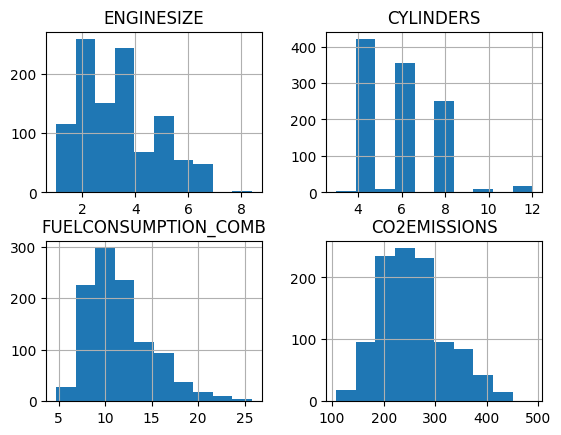

In [31]:
viz=cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

### Get scatter plot between dependent and independent varibes

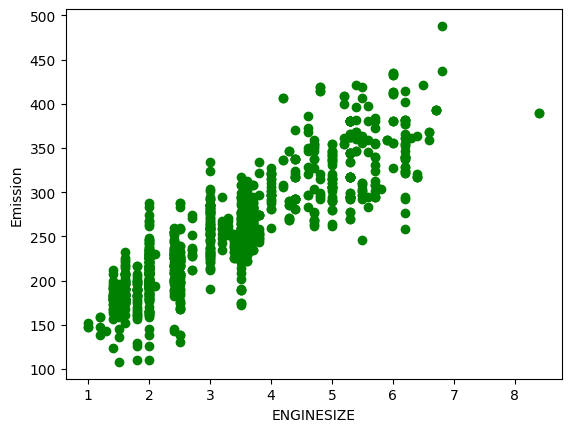

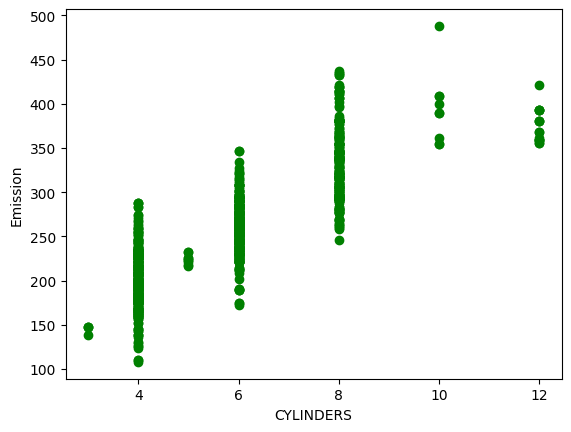

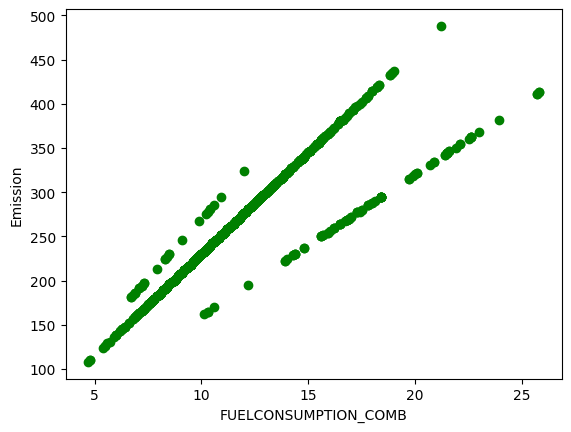

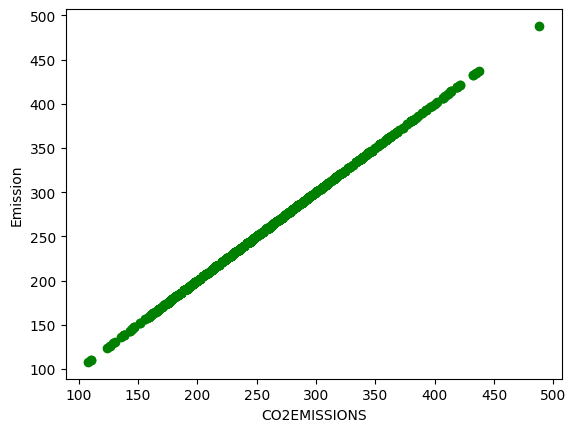

In [32]:
for i in cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]:
    plt.scatter(cdf[i],cdf['CO2EMISSIONS'],color='green')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()

In [33]:
mask=np.random.rand(len(df)) < 0.80                   ### Uniform Random Number
train=cdf[mask]
test=cdf[~mask]

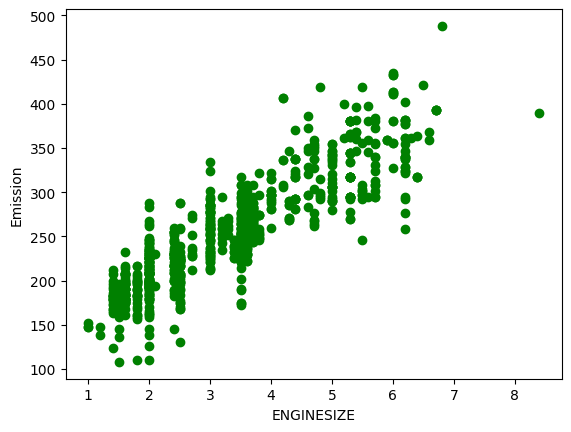

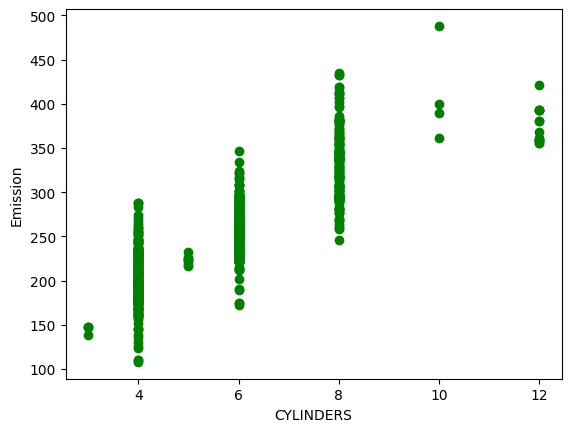

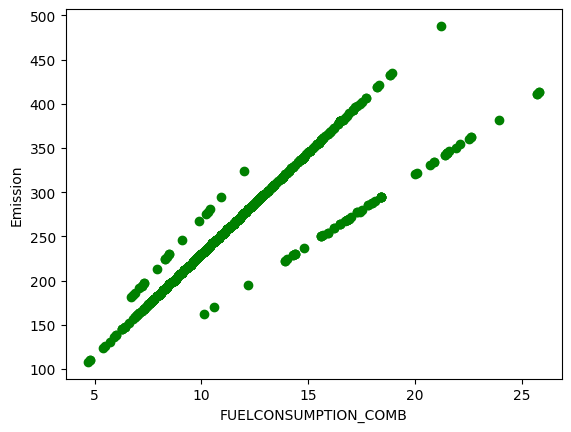

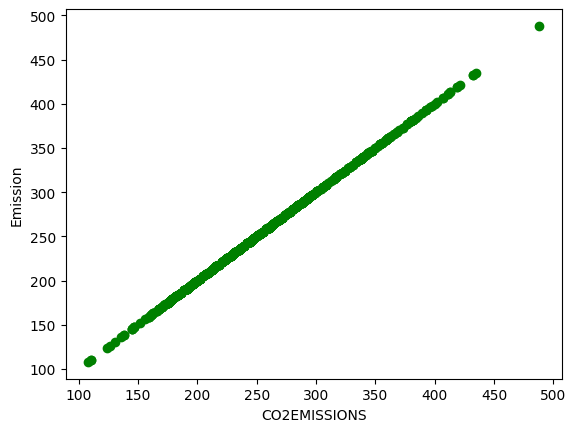

In [34]:
for i in train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]:
    plt.scatter(train[i],train['CO2EMISSIONS'],color='green')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()

In [38]:
regr=linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=  np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)

print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.21233117  7.29005311  9.43280403]]


In [39]:
from sklearn.metrics import r2_score

y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Mean absolute error: 20.23
Residual sum of squares (MSE): 716.90
R2-score: 0.81


c:\Users\Dishang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
